## Import Libraries 

In [21]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [22]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np

## Dataset

In [23]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [24]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

         X0        X1        X2        X3        X4         Y
0 -1.408043 -1.471033  1.633229 -0.290604  0.961177 -0.254732
1  1.032398 -0.876981  1.447610  1.769285 -0.456496  1.569096
2 -0.575908  0.340642 -1.357827  0.662166 -1.183405  0.312267
3 -0.423173 -1.589598 -1.702715  1.555153  1.248038  0.919409
4 -1.467543  0.527410  1.260898 -0.178972 -1.249163 -1.046652


## Parameters 

In [25]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [26]:
generator = network.Generator(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [27]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


Plot loss function 

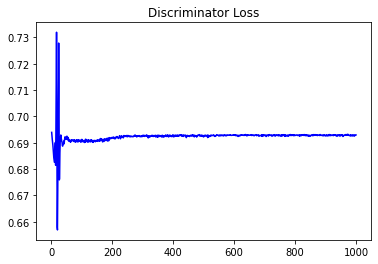

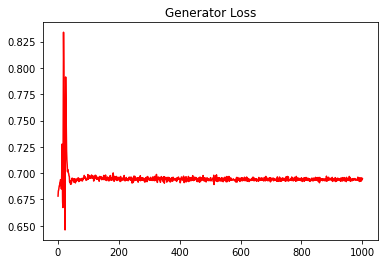

In [28]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [29]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

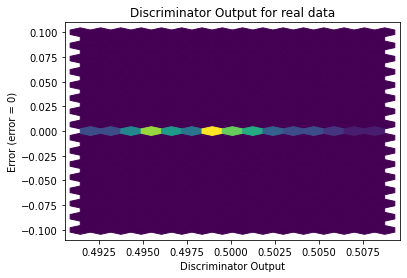

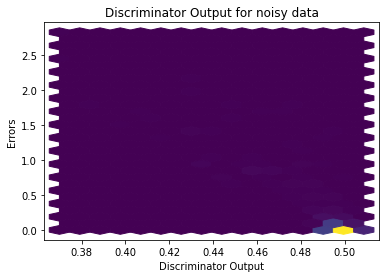

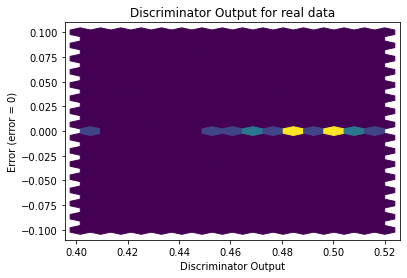

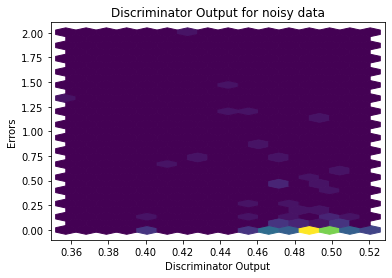

In [30]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)